In [1]:
import numpy as np 
from sklearn.metrics import mean_absolute_error
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

## Data Exploration

In [23]:
#Niharika Jain

In [2]:
datatrain = pandas.read_csv("train1.csv")
datatest = pandas.read_csv("test1.csv")

In [3]:
print(datatrain.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  

In [4]:
print(datatrain.describe())

                 id        cont1        cont2        cont3        cont4  \
count   4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean    8001.285257     0.489721     0.510078     0.502878     0.486362   
std     4585.823427     0.186341     0.206339     0.203341     0.210087   
min        1.000000     0.000016     0.003362     0.027395     0.176921   
25%     4068.500000     0.344779     0.358319     0.336963     0.309621   
50%     7966.000000     0.475784     0.555782     0.527991     0.452887   
75%    11969.500000     0.600512     0.681761     0.634224     0.642745   
max    15928.000000     0.980802     0.862654     0.944251     0.952482   

             cont5        cont6        cont7        cont8        cont9  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean      0.478306     0.489164     0.488733     0.488464     0.482418   
std       0.205857     0.201647     0.181701     0.200008     0.180672   
min       0.281143     0.012

In [5]:
print(datatrain.skew())

id       -0.009207
cont1     0.547836
cont2    -0.341944
cont3     0.028408
cont4     0.442152
cont5     0.748954
cont6     0.460231
cont7     0.808401
cont8     0.682420
cont9     1.106282
cont10    0.385691
cont11    0.265373
cont12    0.283839
cont13    0.378388
cont14    0.238922
loss      3.061738
dtype: float64


# Data cleaning/Feature Engineering

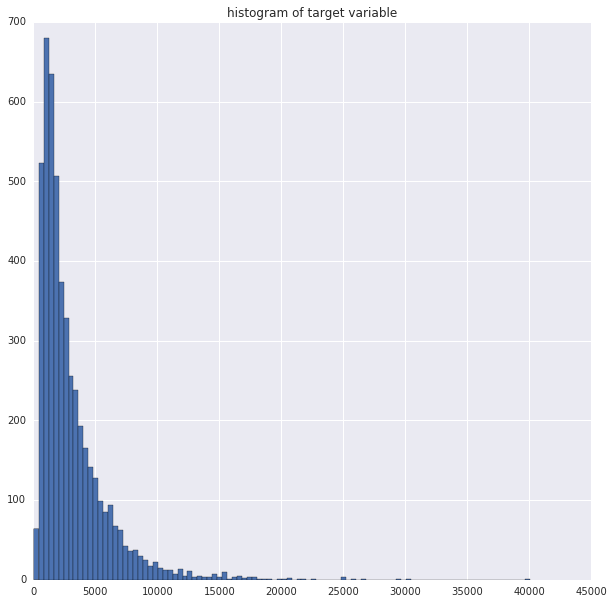

In [6]:
plt.figure(figsize=(10,10))
plt.hist(datatrain.loss, bins=100)
plt.title("histogram of target variable")
plt.show()

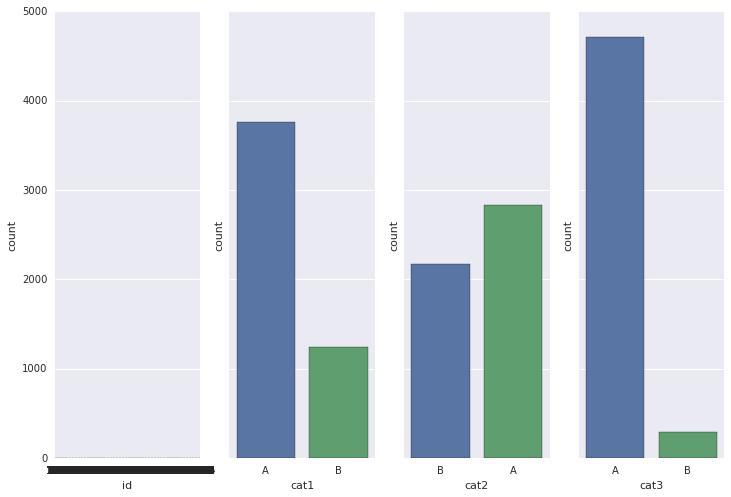

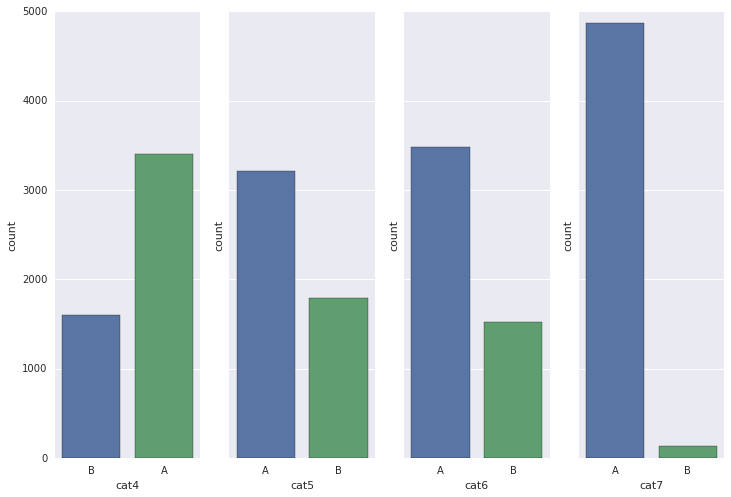

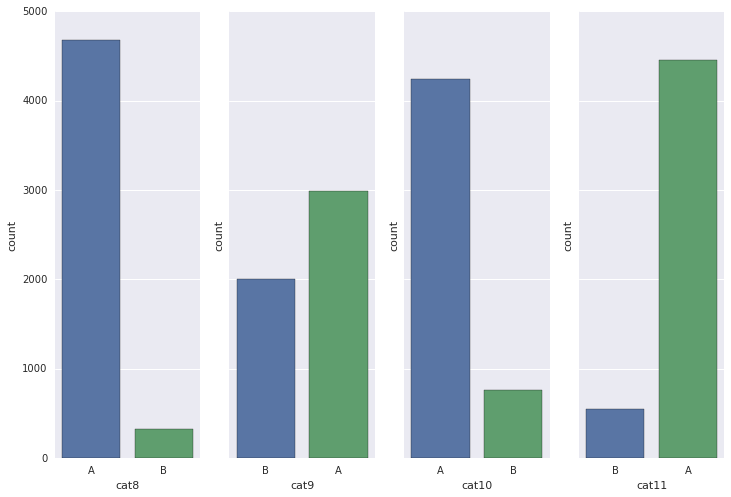

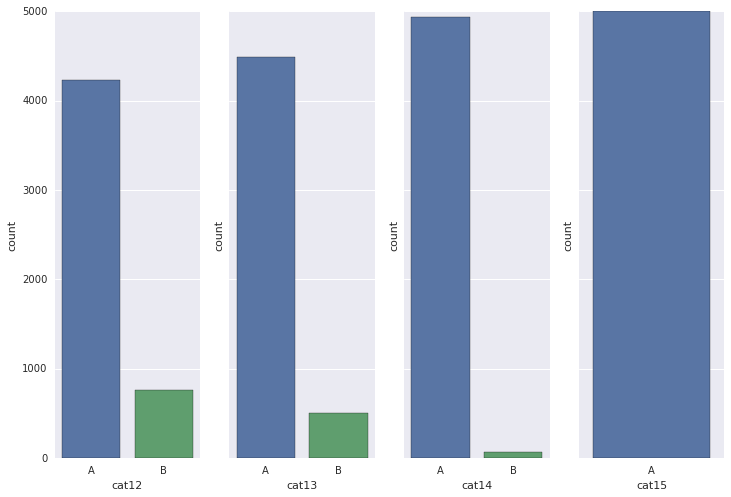

In [24]:
cols = datatrain.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=datatrain, ax=ax[j])

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


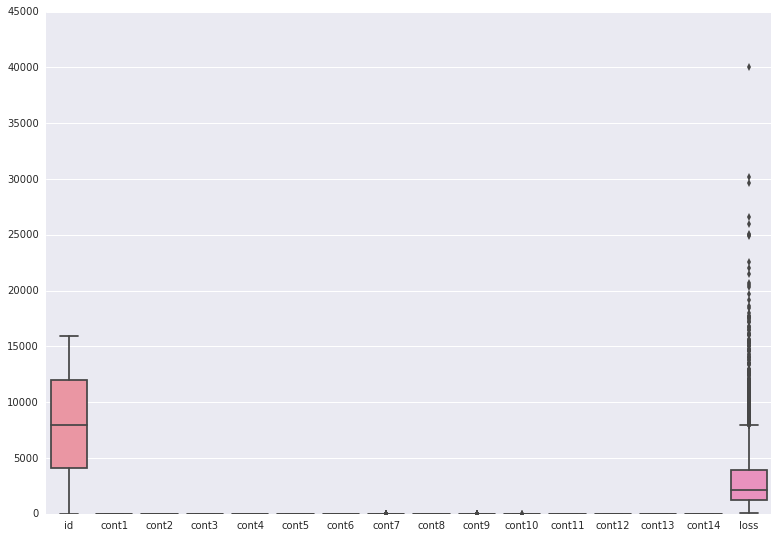

In [8]:
plt.figure(figsize=(13,9))
sns.boxplot(datatrain)

# Model building

In [9]:
#Correlation
#Ridge regression is also known as eleastic net regression and is best used when there are multiple variables

# Calculates pearson co-efficient for all combinations
data_corr = datatrain.corr()
size = 15

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cat11 and cat12 = 0.99
cat1 and cat9 = 0.93
cat6 and cat10 = 0.88
cat1 and cat10 = 0.80
cat6 and cat13 = 0.80
cat6 and cat9 = 0.79
cat9 and cat10 = 0.78
cat6 and cat12 = 0.78
cat6 and cat11 = 0.76
cat1 and cat6 = 0.75
cat7 and cat11 = 0.75
cat7 and cat12 = 0.74
cat10 and cat12 = 0.70
cat10 and cat13 = 0.70
cat10 and cat11 = 0.69
cat6 and cat7 = 0.64
cat9 and cat13 = 0.62
cat9 and cat12 = 0.62
cat1 and cat12 = 0.60
cat9 and cat11 = 0.60
cat1 and cat11 = 0.59
cat4 and cat8 = 0.52
cat1 and cat13 = 0.51


In [10]:
import pandas

split = 116 

#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = datatrain[cols[i]].unique()
    test = datatrain[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(datatrain.iloc[:,i])
    feature = feature.reshape(datatrain.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)
    
# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
datatrain_encoded = np.concatenate((encoded_cats,datatrain.iloc[:,split:].values),axis=1)

#get the number of rows and columns
r, c = datatrain_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = datatrain_encoded[:,0:(c-1)]
Y = datatrain_encoded[:,(c-1)]
del datatrain_encoded

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

(4999, 5641)


## Model evaluation (Regression)

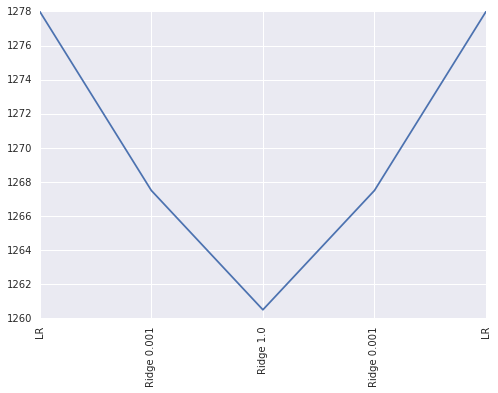

In [15]:
#Evaluation of various combinations of LinearRegression

#Import the library
from sklearn.linear_model import LinearRegression

#uncomment the below lines if you want to run the algo
##Set the base model
#model = LinearRegression(n_jobs=-1)
#algo = "LR"
#
##Accuracy of the model using all features
#for name,i_cols_list in X_all:
#    model.fit(X_train[:,i_cols_list],Y_train)
#    result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
#    mae.append(result)
#    print(name + " %s" % result)
#comb.append(algo)

#Result obtained after running the algo. Comment the below two lines if you want to run the algo
mae.append(1278)
comb.append("LR" )    

##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#MAE achieved is 1278

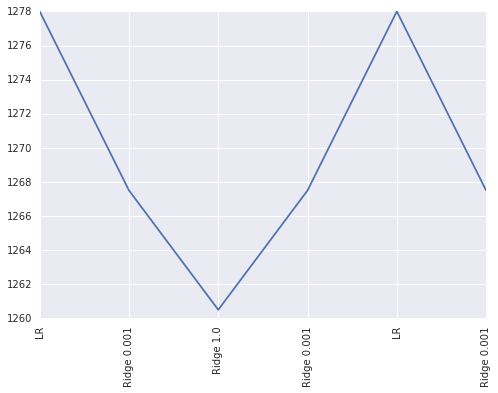

In [16]:
#Evaluation of various combinations of Ridge LinearRegression

#Import the library
from sklearn.linear_model import Ridge

#Add the alpha value to the below list if you want to run the algo
a_list = np.array([])

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )


if (len(a_list)==0):
    mae.append(1267.5)
    comb.append("Ridge" + " %s" % .001 )    
    
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    


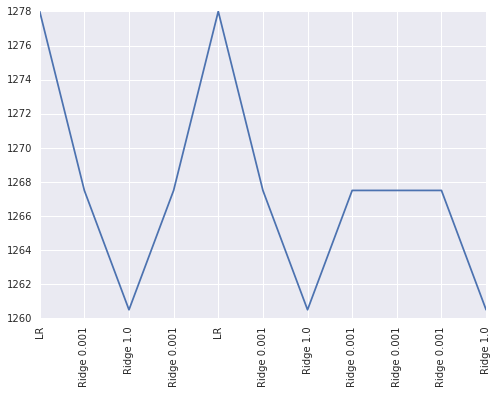

In [21]:
#Evaluation of various combinations of Ridge LinearRegression

#Import the library
from sklearn.linear_model import Ridge

a_list = np.array([])

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

#Result obtained by running the algo for alpha=1.0    
if (len(a_list)==0):
    mae.append(1260.5)
    comb.append("Ridge" + " %s" % 1.0 )    
    
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

# Model Evaluation (AdaBoost)

In [34]:
#Evaluation of various combinations of AdaBoost

#Import the library
from sklearn.ensemble import AdaBoostRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([])

for n_estimators in n_list:
    #Set the base model
    model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "Ada"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1678)
    comb.append("Ada" + " %s" % 100 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is 1678 with n=100

# Model interpretation

#Evaluation of various combinations of Ridge LinearRegression
##Best estimated performance is 1262.5 for alpha = 0.001 

In [37]:
#Evaluation of various combinations of Ridge LinearRegression

#Import the library
from sklearn.linear_model import Ridge

#Add the alpha value to the below list if you want to run the algo
a_list = np.array([])

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )


if (len(a_list)==0):
    mae.append(1267.5)
    comb.append("Ridge" + " %s" % .001 )    
    
##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    


#Models used: Santosh (Kaggle) , Denoiser (Kaggle) & Introduction to Machine Learning Course on Coursera (for Linear & Ridge Regression)